In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
wine = load_wine()

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [7]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [8]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       2])

In [12]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [13]:
result

,0,1
0,1,1
1,2,2
2,1,0
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,0,0
9,2,2


In [14]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [16]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.23834042e+00, -2.69319302e-02,  4.46518526e+00,
        -6.73401822e-01,  2.51216407e-02, -3.01606008e+00,
         6.13115280e+00,  4.20062362e+00, -1.36431247e+00,
        -8.56018702e-01,  1.46598242e-01,  5.78544442e+00,
         1.45023008e-02],
       [-2.03363164e+00, -4.32907677e-01, -6.24506394e+00,
         4.10138156e-01, -5.48579728e-03, -2.11754060e-01,
         1.50326059e+00,  4.11810299e+00,  9.41586766e-01,
        -6.03453838e-01,  5.75280508e+00, -8.72134753e-02,
        -8.09904615e-03],
       [-3.12096129e-01,  5.69457722e-01,  2.08392403e+00,
         3.43336687e-01, -2.49475338e-02,  4.07166644e+00,
        -9.60391006e+00, -1.03994941e+01,  5.58747912e-01,
         1.82766390e+00, -7.30048828e+00, -7.20006049e+00,
        -8.30145445e-03]])

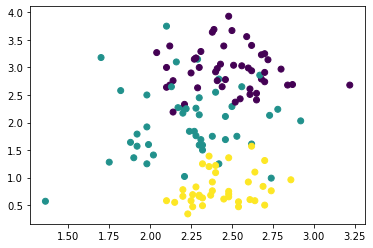

In [17]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [18]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

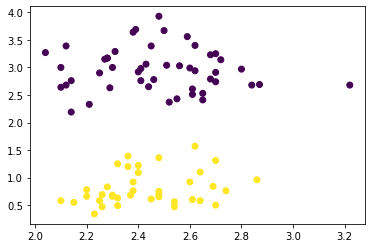

In [19]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [20]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [21]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.47291667, 2.95708333],
       [2.43131579, 0.80763158]])

<ipython-input-22-a5d3738cda27>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


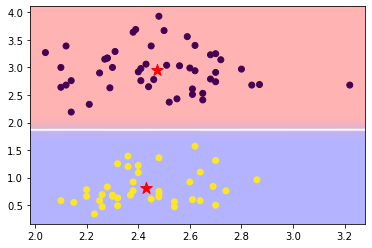

In [22]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [23]:
# второй признак в 17 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  0.02296154, -17.13198429]])

In [24]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [25]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [28]:
lr.predict(small_test)

array([2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2])

In [29]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [30]:
lr.coef_

array([[ 0.02325728, -3.21226004]])

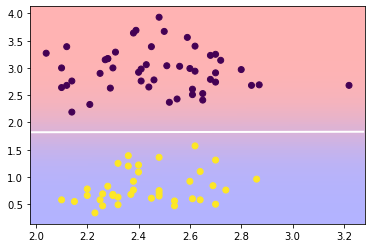

In [31]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [32]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [33]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [34]:
X

array([[  9.99047887,   7.0859652 ],
       [ -4.73391706,   7.08914317],
       [ 10.70020047,  15.64401019],
       [  7.27135487,   1.99795338],
       [ -2.40848889,   4.61788712],
       [  8.36386118,   7.12812728],
       [ -6.67097903,   9.14194721],
       [  7.79609499,  13.6137854 ],
       [ -5.97506425,   9.54947484],
       [ -4.7879057 ,   8.27063652],
       [  7.55140928,  10.44480663],
       [ -4.88930905,   9.85232456],
       [ -5.08615346,  10.60501289],
       [ 11.58476414,   8.55337253],
       [  6.40451331,   6.17462156],
       [ -5.84525888,   5.32271322],
       [  9.78286449,  10.65547983],
       [ -3.61205345,   7.27792071],
       [ -6.7879155 ,   6.88426984],
       [ -9.14015911,   8.35140106],
       [ -4.78739789,   5.13312535],
       [ -4.24318244,   7.82881841],
       [-11.09309785,   9.68615599],
       [ 11.87181188,   5.82401182],
       [ -4.48266929,   5.40217888],
       [ -7.32785516,   5.02345642],
       [  7.9530033 ,   6.17723287],
 

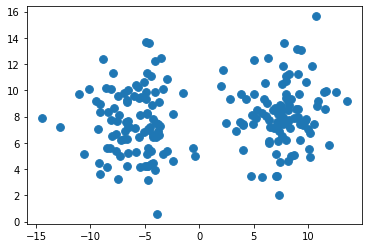

In [35]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [36]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [38]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

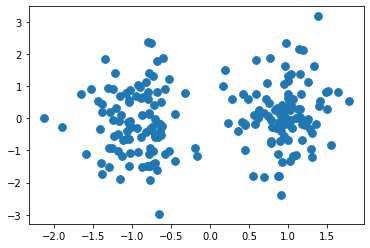

In [39]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [40]:
from sklearn.cluster import KMeans

In [41]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0], dtype=int32)

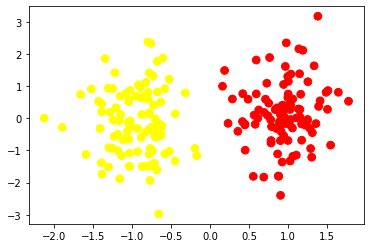

In [42]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [43]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

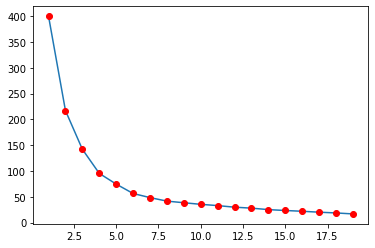

In [44]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [45]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

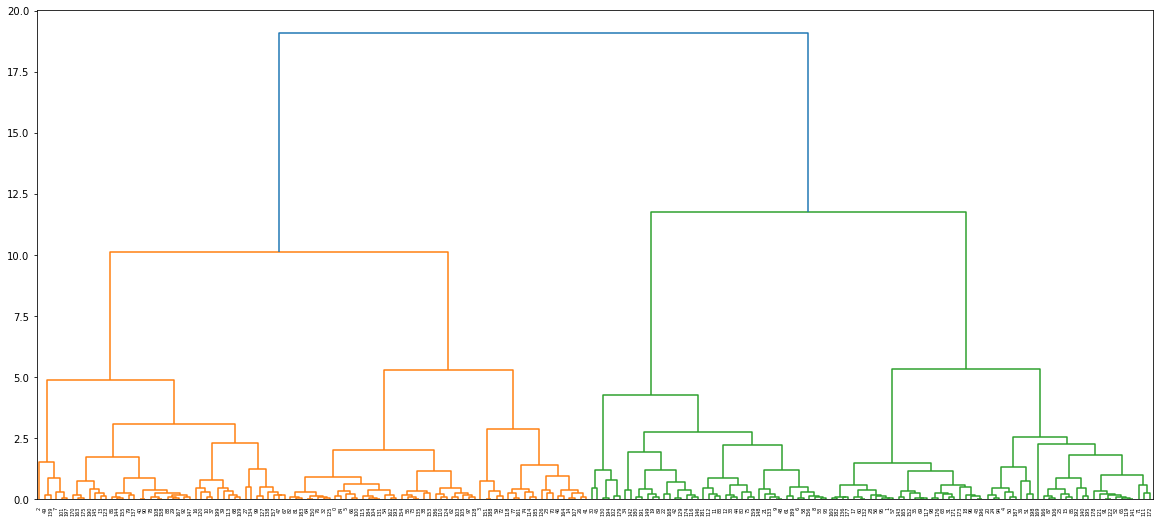

In [46]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [47]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [48]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

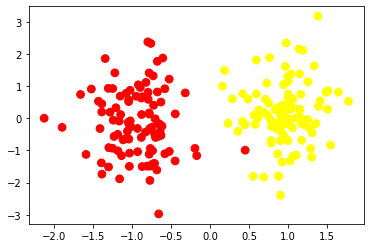

In [49]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)